In [5]:
#IMPORTING SUITABLE LIBRARIES AND FRAMEOWRKS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import cv2
import os
import tensorflow as tf


In [6]:
datadir="Desktop/photo/"

In [7]:
categories=["Apple___Apple_scab","Apple___Black_rot","Apple___Cedar_apple_rust","Apple___healthy","Blueberry___healthy"]

In [8]:
for category in categories:
    path =os.path.join(datadir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),1)#,cv2.IMREAD_GRAYSCALE)
        #plt.imshow(img_array,cmap="gray")
        #plt.show()

In [10]:
img_array

array([[[209, 203, 214],
        [206, 200, 211],
        [179, 173, 184],
        ...,
        [132, 125, 138],
        [152, 145, 158],
        [166, 159, 172]],

       [[214, 208, 219],
        [211, 205, 216],
        [195, 189, 200],
        ...,
        [124, 117, 130],
        [162, 155, 168],
        [171, 164, 177]],

       [[207, 202, 212],
        [207, 201, 212],
        [211, 205, 216],
        ...,
        [178, 171, 184],
        [148, 141, 154],
        [172, 165, 178]],

       ...,

       [[188, 179, 192],
        [187, 178, 191],
        [186, 177, 190],
        ...,
        [129, 122, 137],
        [130, 123, 138],
        [125, 118, 133]],

       [[185, 176, 189],
        [184, 175, 188],
        [183, 174, 187],
        ...,
        [136, 129, 144],
        [135, 128, 143],
        [124, 117, 132]],

       [[193, 184, 197],
        [190, 181, 194],
        [186, 177, 190],
        ...,
        [176, 169, 184],
        [166, 159, 174],
        [142, 135, 150]]

(250, 250, 3)


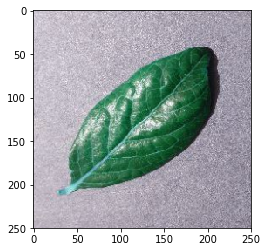

In [9]:
img_array=cv2.resize(img_array,(250,250))
print(img_array.shape)
plt.imshow(img_array)


In [9]:
training_data=[]
def create_training_data():
    for category in categories:
        path =os.path.join(datadir,category)
        class_num=categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),0)#,cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(200,200))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()
                
    

NameError: global name 'os' is not defined

In [7]:
len(training_data)

3596

In [8]:
training_data

[[array([[142, 167, 160, ..., 140, 161, 156],
         [203, 182, 165, ..., 133, 155, 157],
         [194, 188, 169, ..., 124, 125, 176],
         ...,
         [147, 154, 153, ..., 105, 105, 122],
         [151, 156, 157, ..., 123, 129, 143],
         [160, 159, 158, ..., 137, 149, 158]], dtype=uint8), 0],
 [array([[156, 159, 152, ..., 135, 144, 139],
         [152, 155, 151, ..., 151, 147, 142],
         [152, 153, 151, ..., 139, 140, 150],
         ...,
         [141, 141, 140, ..., 152, 156, 154],
         [147, 145, 144, ..., 156, 161, 160],
         [145, 144, 141, ..., 153, 156, 155]], dtype=uint8), 0],
 [array([[144, 144, 144, ..., 140, 138, 136],
         [144, 144, 144, ..., 139, 138, 137],
         [145, 145, 145, ..., 138, 138, 138],
         ...,
         [ 61,  57,  57, ...,  97,  88,  98],
         [ 54,  64,  66, ...,  87,  87,  90],
         [ 41,  50,  58, ...,  73,  89,  82]], dtype=uint8), 0],
 [array([[136, 135, 131, ..., 120, 108, 102],
         [137, 136, 131, ..

In [9]:

import random
random.shuffle(training_data)

In [10]:
x=[]
y=[]
for feature,label in training_data:
    x.append(feature)
    y.append(label)

In [11]:
X=np.array(x).reshape(-1,200,200,1)

In [12]:
X.shape

(3596, 200, 200, 1)

In [13]:
X/=250

In [14]:
X1=X[1:5]

In [15]:


X.shape

(3596, 200, 200, 1)

In [16]:
y=np.array(y)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
#ss=StandardScaler()

In [19]:
#X=ss.fit_transform(X)

In [20]:
# Importing the required Keras modules containing model and layers
input_shape=(200,200,1)
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(450, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(450, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())# Flattening the 2D arrays for fully connected layers
model.add(Dropout(0.3))
model.add(Dense(200, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(5,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
#model.fit(x=X,y=y,batch_size=1,epochs=10)
model.fit_gererator(x=X,y=y,steps_per_epoch=100,epochs=10)

Epoch 1/10


In [ ]:
"""history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)"""